# Author: **KAMAKSHI**
# Task6: Prediction Using Decision Trees Algorithm
## The Sparks Foundation
## GRIPNOV20

**Create the decision tree classifier and visualize it graphically**

- **Import libraries**

In [1]:
#Import  Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

- **Upload the Iris dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

- **Read the dataset**

In [24]:
import io
df =  pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- **Information about the dataframe**

In [25]:

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- **Statistical description of each feature**

In [26]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


- **Checking for the presence of empty records**

In [27]:

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- **dropping the Id column as it is unecessary**

In [28]:

df.drop('Id',axis=1,inplace=True)

- **Some Exploratory Data Analysis** 

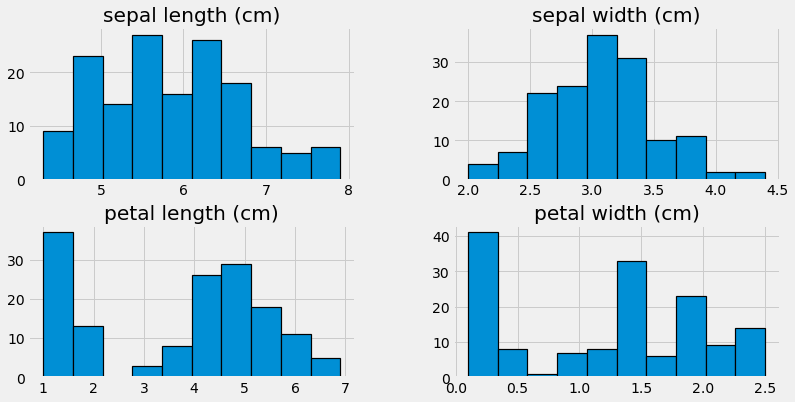

In [16]:
plt.style.use('fivethirtyeight')
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

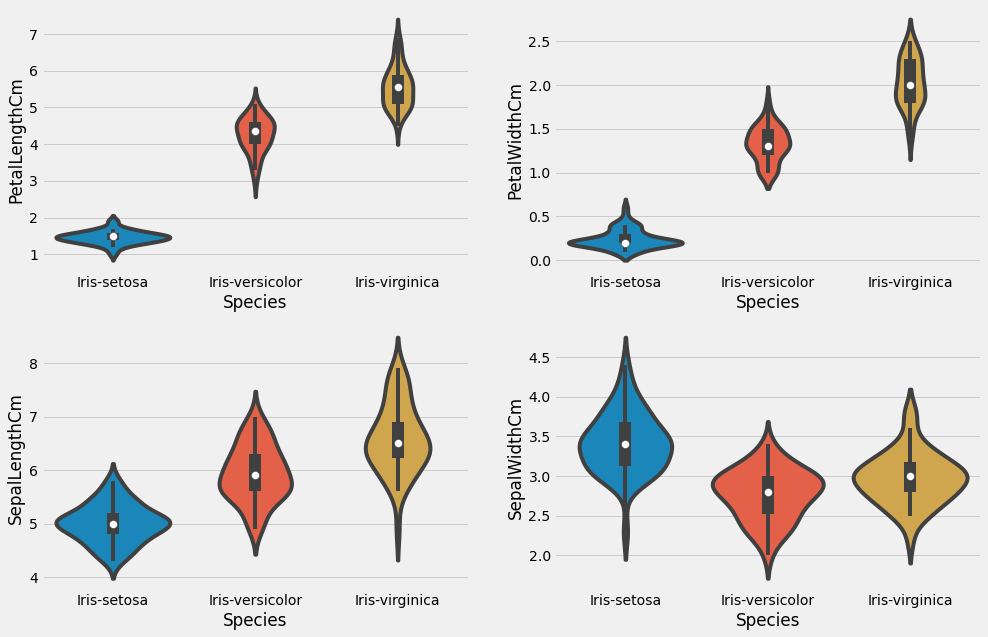

In [29]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

- **pairplot without the target variable**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


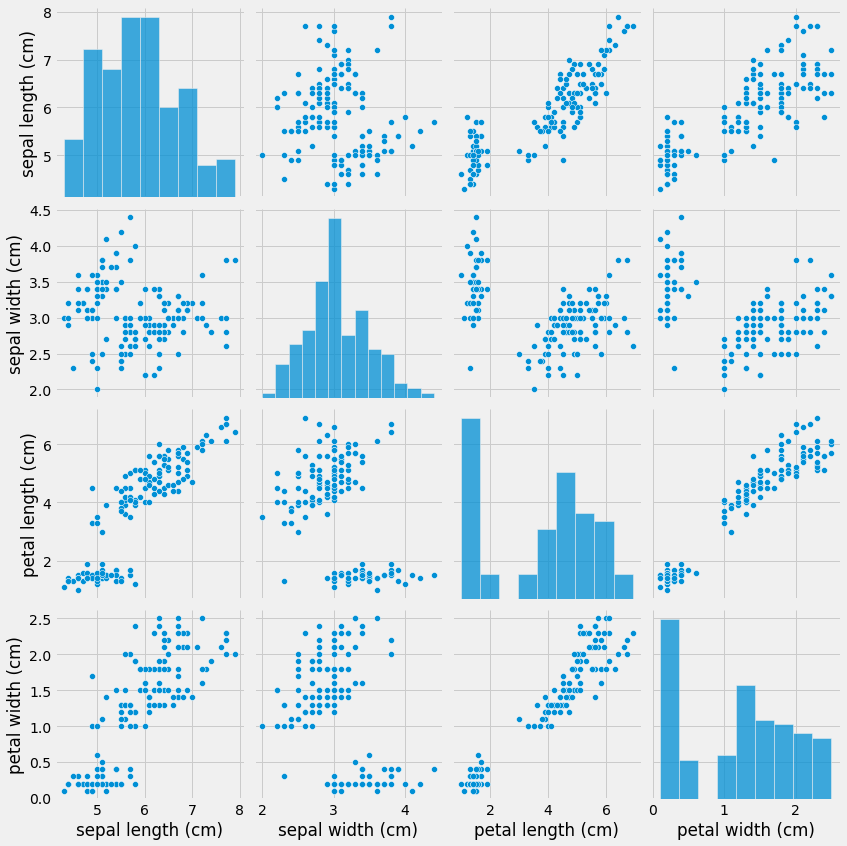

In [21]:

import seaborn as sns
sns.pairplot(df,size=3)
plt.show()

- **pairplot with the target variable**

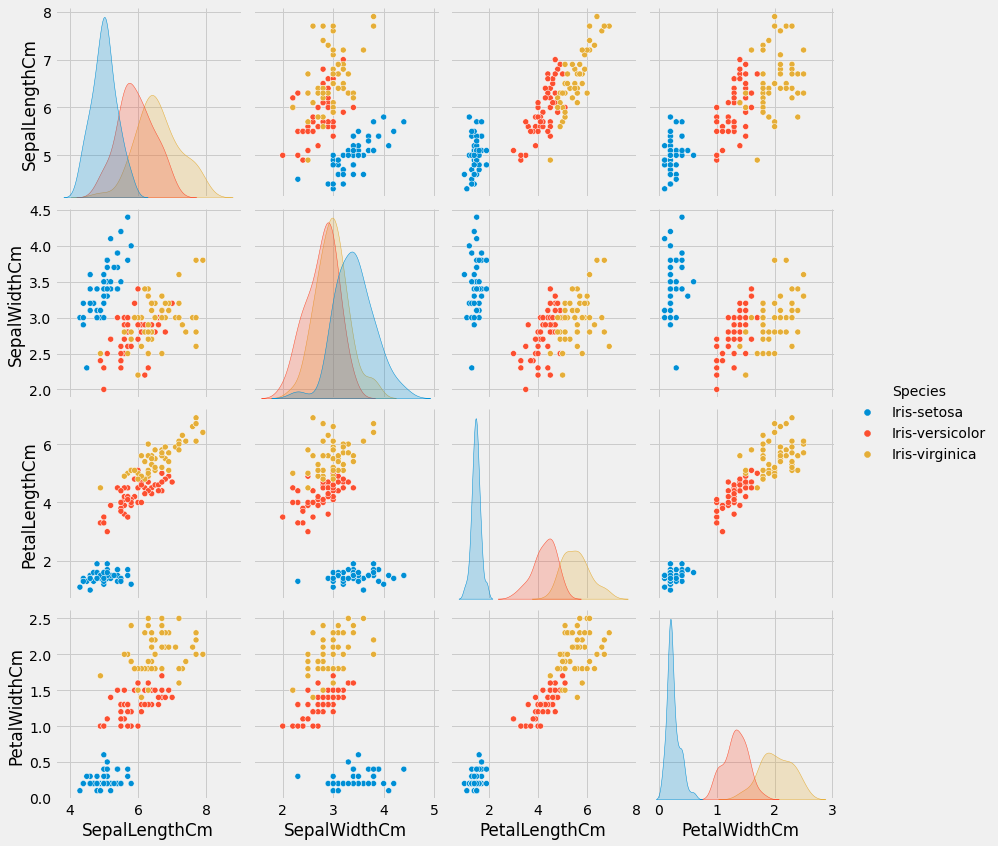

In [30]:

import seaborn as sns
sns.pairplot(df,hue = 'Species',size=3)
plt.show()

**before applying decision tree classifier let's first check out the correlation between all the features**


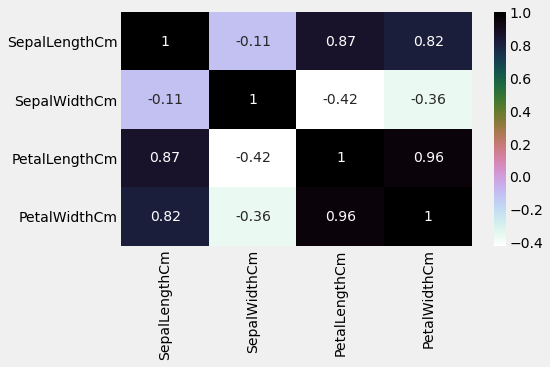

In [31]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix 
plt.show()



The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated.
We will use all the features for training the algorithm and check the accuracy. 

- **Splitting The Data into Training And Testing Dataset**

In [32]:
# in this our main data is split into train and test
train, test = train_test_split(df, test_size = 0.3)
# test_size=0.3 splits the data into 70% and 30% ratio. 
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [40]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values# taking the training data features
y_train=train.Species# output of our training data
X_test= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values # taking test data features
y_test =test.Species   #output value of test data

In [42]:
X_train[1:5]

array([[6.4, 2.8, 5.6, 2.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 2.5, 5.8, 1.8]])

In [36]:
y_train.head()

140    Iris-virginica
128    Iris-virginica
6         Iris-setosa
143    Iris-virginica
108    Iris-virginica
Name: Species, dtype: object

- **Model building**

In [43]:
from sklearn import metrics
model=DecisionTreeClassifier(criterion='gini',random_state=100)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.9555555555555556


- **Confusion Matrix**


In [44]:
print("Confusion Matrix:",confusion_matrix(y_test,prediction))

Confusion Matrix: [[15  0  0]
 [ 0 15  1]
 [ 0  1 13]]


- **CLassification Report**

In [45]:
print("Report:",classification_report(y_test,prediction))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



**Visualization of Desicion Tree Model**

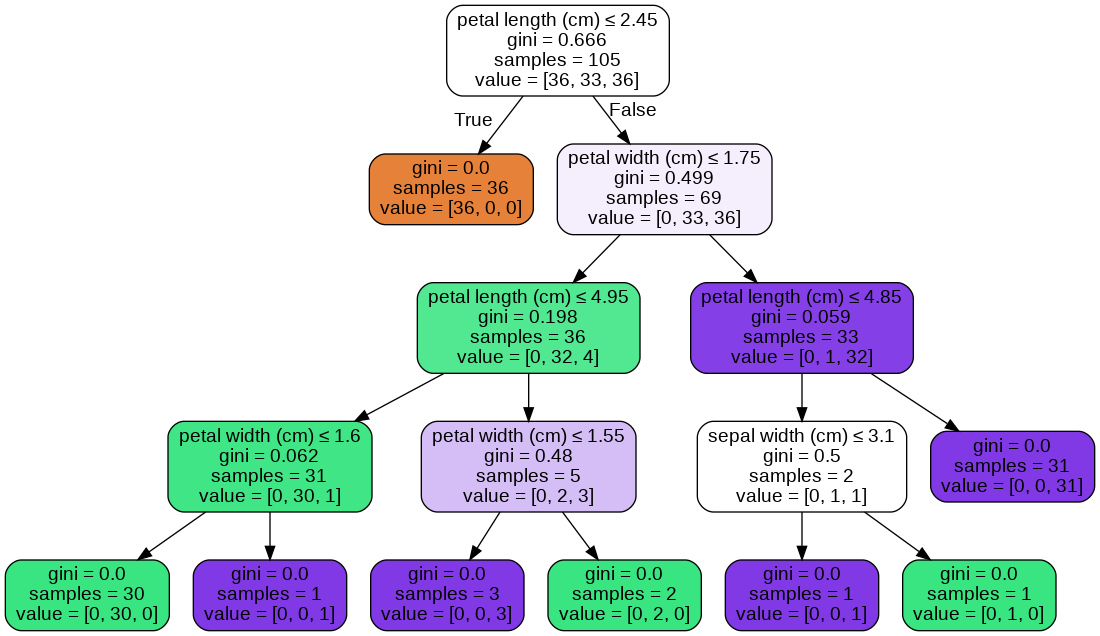

In [47]:
## Function to make tree
from io import StringIO ## for Python 3
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
y=iris.target
Feature_cols=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=10)
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=Feature_cols)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Subcategory.png')
Image(graph.create_png())